In [40]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


15000
Final number of trajectories: 123


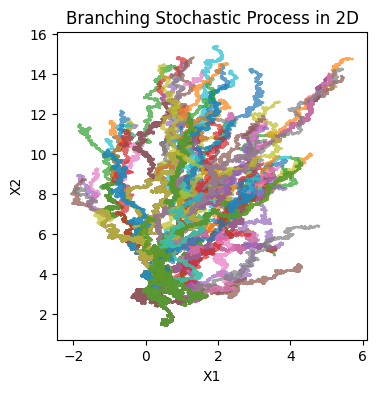

In [3]:
d = 2
A = np.array([[1, 0.1], 
              [-0.1, 1]])

# A = np.array([1.0])

G = np.array([[1, 0.0], 
              [0.0, 1]])

G = np.eye(d)
# G = np.array([1.0])

H = G@G.T

growth_rate = 3
# lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
# lambda_func = lambda X: growth_rate # 1.0 # 1.0 # Constant branching rate

N_init = 1
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
# X0 = np.random.normal(0, 1, (N_init))
Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
# process = BranchingStochasticProcess(A, G, X0, no_branch_lambda_func, dt=0.0001, T=2.0, N_traj=10)
process.simulate(X0, growth_rate=growth_rate)
print("Final number of trajectories:", process.N_traj)
# print(process.lineage_tree)
process.plot_trajectories(downsample=1)

# process.save_file(f'data/trajectories.h5', downsample_rate=500)

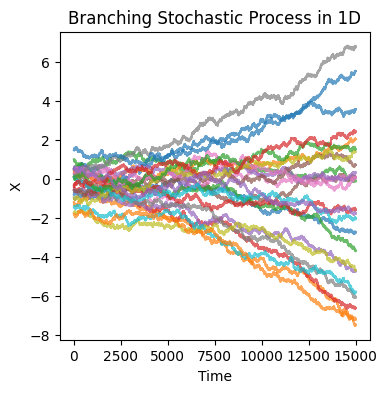

In [405]:
process.plot_trajectories(downsample=1, dim=1)

In [406]:
# xs_data: (N, N_traj, d)
# ts_data: (N,)
downsample_rate = 100

ts_data = process.ts[::downsample_rate]
xs_data = process.marginals(downsample_rate=downsample_rate)

# xs_data = marginals(apply_permutation(process.trajectories[:, :-1:downsample_rate, :]))

print("N traj", process.N_traj, "N time steps", ts_data.shape[0])

ridge_lambda = 0.0

A_guess = A # np.eye(2) # A
H_guess = G@G.T # np.eye(2) # G@G.T
As, Hs, Pis = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=process.N_traj*10, ridge_lambda=ridge_lambda, tol=1e-5, maxiters=10, print_out=1, save_coupling=True)
A_est = As[-1]
H_est = Hs[-1]
Pi_est = Pis[-1]
print("A_est:\n", A_est)
print("H_est:\n", H_est)
branch_times_data = np.array(process.branch_times) // downsample_rate
branch_times_data

N traj 25 N time steps 150
iteration 0, running tolerance 1.4212670403551897
iteration 1, running tolerance 0.1092020932196444
iteration 2, running tolerance 0.03743155076472946
iteration 3, running tolerance 0.043700885272631565
iteration 4, running tolerance 0.04804307460781618
iteration 5, running tolerance 0.05164964182290349
iteration 6, running tolerance 0.040041835021710034
iteration 7, running tolerance 0.04229658066196803
iteration 8, running tolerance 0.03718916574186031
iteration 9, running tolerance 0.09356691783694107
A_est:
 [[ 1.00629561 -0.07288477]
 [-0.10760696  0.94798266]]
H_est:
 [[1.0412814  0.01031917]
 [0.01031917 1.07638257]]


array([], dtype=float64)

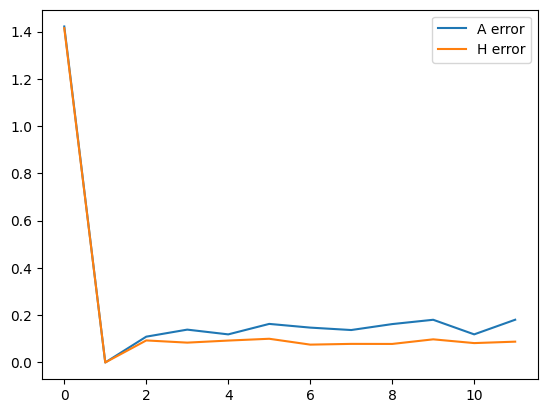

In [407]:
plt.plot(matrix_errors(process, As, Hs)[0], label="A error")
plt.plot(matrix_errors(process, As, Hs)[1], label="H error")
plt.legend()

25 25


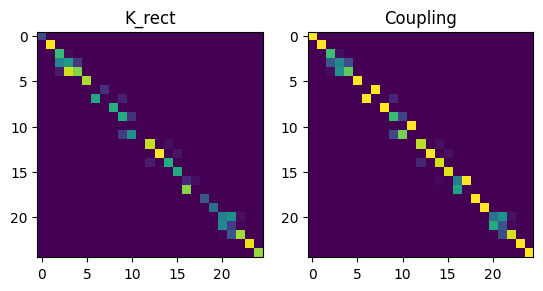

In [ ]:
idx=0 # branch_times_data[4]
# idx = 10
plot_kernel_coupling(idx, xs_data, ts_data, A_est, H_est)


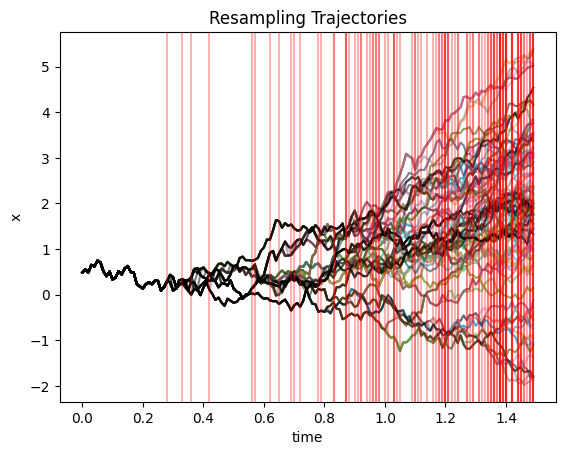

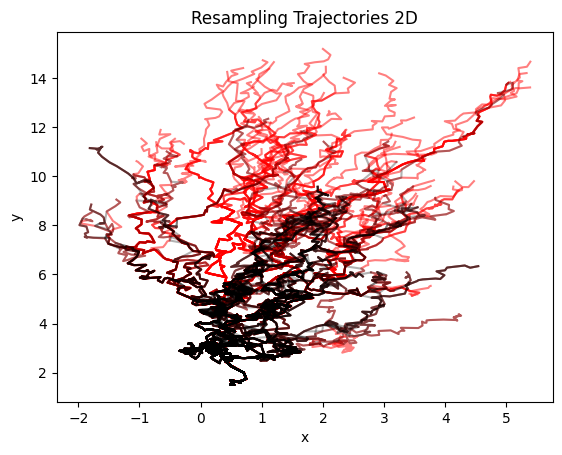

In [37]:
plot_sampling(xs_data, ts_data, Pi_est, process.downsample(downsample_rate), branch_times_data, N_sample=40, plot_dim=1)
plot_sampling(xs_data, ts_data, Pi_est, process.downsample(downsample_rate), branch_times_data, N_sample=100, plot_dim=2)